In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit

LdivS = 5.3 * 100
dLdivS = 0.1 * 100
V = 775 * 10**(-6)
dV = 10 * 10**(-6)

In [2]:
def make_raw_plot(pressure):
    file_name = "{}torr.csv".format(pressure)

    data_table = pd.read_csv(file_name).to_numpy()

    x = data_table[:, 0]
    exp_y = data_table[:, len(data_table[0]) - 1]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $U(t)$ при давлении $ {}~торр$".format(pressure))
    plt.ylabel(r"$U, мВ$")
    plt.xlabel(r"$t, сек$")

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x, exp_y, "b", label = "Экспериментальные данные")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/raw{}.png".format(pressure))
    plt.show()

def make_raw_plot_with_correction(pressure):
    file_name = "{}torr.csv".format(pressure)

    data_table = pd.read_csv(file_name).to_numpy()

    x = data_table[:, 0]
    if len(data_table[0]) != 3:
        raise "Correction column not found"
    exp_y = data_table[:, 1]
    corr_exp_y = data_table[:, 2]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $U(t)$ при давлении $ {}~торр$".format(pressure))
    plt.ylabel(r"$U, мВ$")
    plt.xlabel(r"$t, сек$")

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x, exp_y, "b", label = "Экспериментальные данные")
    plt.plot(x, corr_exp_y, "r", label = "Экспериментальные данные с коррекцией систематической ошибки")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/raw{}.png".format(pressure))
    plt.show()

def make_lin_plot(pressure):
    global V, dV, LdivS, dLdivS
    file_name = "{}torr.csv".format(pressure)

    data_table = pd.read_csv(file_name).to_numpy()

    x = data_table[:, 0]
    exp_y = data_table[:, len(data_table[0]) - 1]
    y = [np.log(exp_y[i] / 1000) for i in range(len(exp_y))]

    def func(x, k, b):
        return x * k + b

    popt, pcov = curve_fit(func, x, y, p0 = (0.0, 0.0))
    k, b = popt
    dk, db = np.sqrt(np.diag(pcov))

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $(ln U)(t)$ при давлении $ {}~торр$".format(pressure))
    plt.ylabel(r"$ln U, ln В$")
    plt.xlabel(r"$t, сек$")

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x, y, "b", label = "Экспериментальные данные", linewidth = 4)
    plt.plot(x_lin, func(x_lin, k, b), "r", label = "Линейная аппроксимация")
    # plt.errorbar(x, y, markersize = 9, markerfacecolor = 'r', label = 'Экспериментальные значения')

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/log{}.png".format(pressure))
    plt.show()

    D = - k * V * LdivS / 2
    dD = D * np.sqrt((dV/V)**2 + (dLdivS/LdivS)**2 + (dk/k)**2)

    results = pd.DataFrame([[D, dD, k, b, dk, db]], columns = ["D", "dD", "k", "b", "dk", "db"])
    results.to_csv("mnk{}.csv".format(pressure), index = False)


In [3]:
def make_raw_plot(pressure):
    file_name = "{}torr.csv".format(pressure)

    data_table = pd.read_csv(file_name).to_numpy()

    x = data_table[:, 0]
    exp_y = data_table[:, len(data_table[0]) - 1]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $U(t)$ при давлении $ {}~торр$".format(pressure))
    plt.ylabel(r"$U, мВ$")
    plt.xlabel(r"$t, сек$")

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x, exp_y, "b", label = "Экспериментальные данные")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/raw{}.png".format(pressure))
    plt.show()

def make_raw_plot_with_correction(pressure):
    file_name = "{}torr.csv".format(pressure)

    data_table = pd.read_csv(file_name).to_numpy()

    x = data_table[:, 0]
    if len(data_table[0]) != 3:
        raise "Correction column not found"
    exp_y = data_table[:, 1]
    corr_exp_y = data_table[:, 2]

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $U(t)$ при давлении $ {}~торр$".format(pressure))
    plt.ylabel(r"$U, мВ$")
    plt.xlabel(r"$t, сек$")

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x, exp_y, "b", label = "Экспериментальные данные")
    plt.plot(x, corr_exp_y, "r", label = "Экспериментальные данные с коррекцией систематической ошибки")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/raw{}.png".format(pressure))
    plt.show()

def make_lin_plot(pressure):
    global V, dV, LdivS, dLdivS
    file_name = "{}torr.csv".format(pressure)

    data_table = pd.read_csv(file_name).to_numpy()

    x = data_table[:, 0]
    exp_y = data_table[:, len(data_table[0]) - 1]
    y = [np.log(exp_y[i] / 1000) for i in range(len(exp_y))]

    def func(x, k, b):
        return x * k + b

    popt, pcov = curve_fit(func, x, y, p0 = (0.0, 0.0))
    k, b = popt
    dk, db = np.sqrt(np.diag(pcov))

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(r"График зависимости $(ln U)(t)$ при давлении $ {}~торр$".format(pressure))
    plt.ylabel(r"$ln U, ln В$")
    plt.xlabel(r"$t, сек$")

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x, y, "b", label = "Экспериментальные данные", linewidth = 4)
    plt.plot(x_lin, func(x_lin, k, b), "r", label = "Линейная аппроксимация")
    # plt.errorbar(x, y, markersize = 9, markerfacecolor = 'r', label = 'Экспериментальные значения')

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("../graphs/log{}.png".format(pressure))
    plt.show()

    D = - k * V * LdivS / 2
    dD = D * np.sqrt((dV/V)**2 + (dLdivS/LdivS)**2 + (dk/k)**2)

    results = pd.DataFrame([[D, dD, k, b, dk, db]], columns = ["D", "dD", "k", "b", "dk", "db"])
    results.to_csv("mnk{}.csv".format(pressure), index = False)


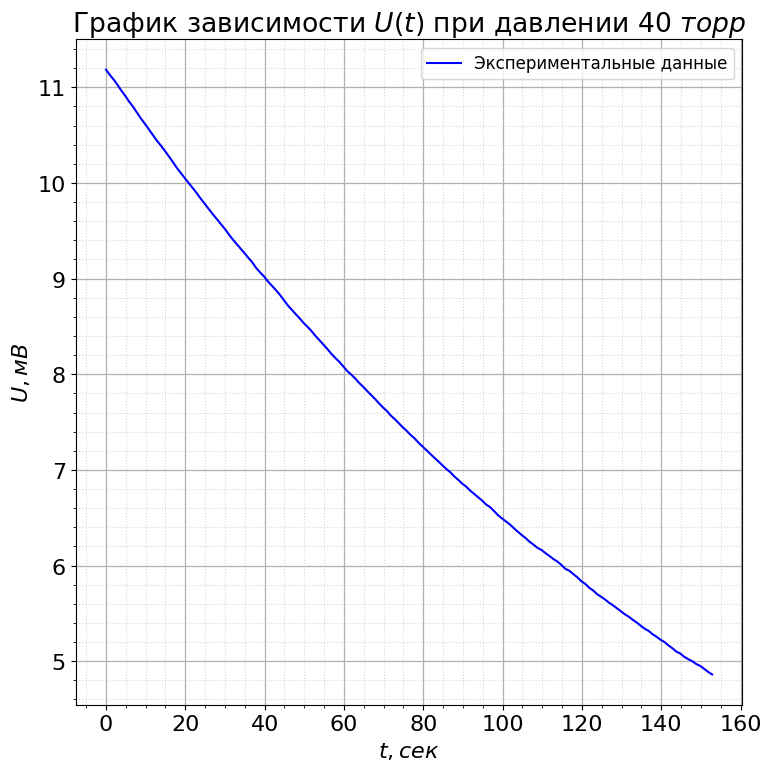

In [4]:
make_raw_plot(40)

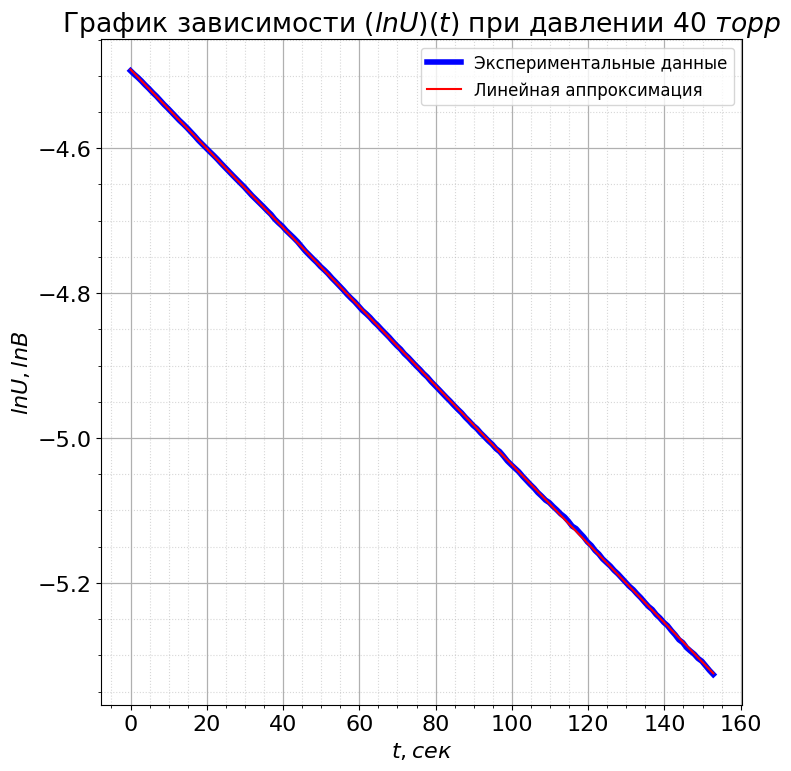

In [5]:
make_lin_plot(40)

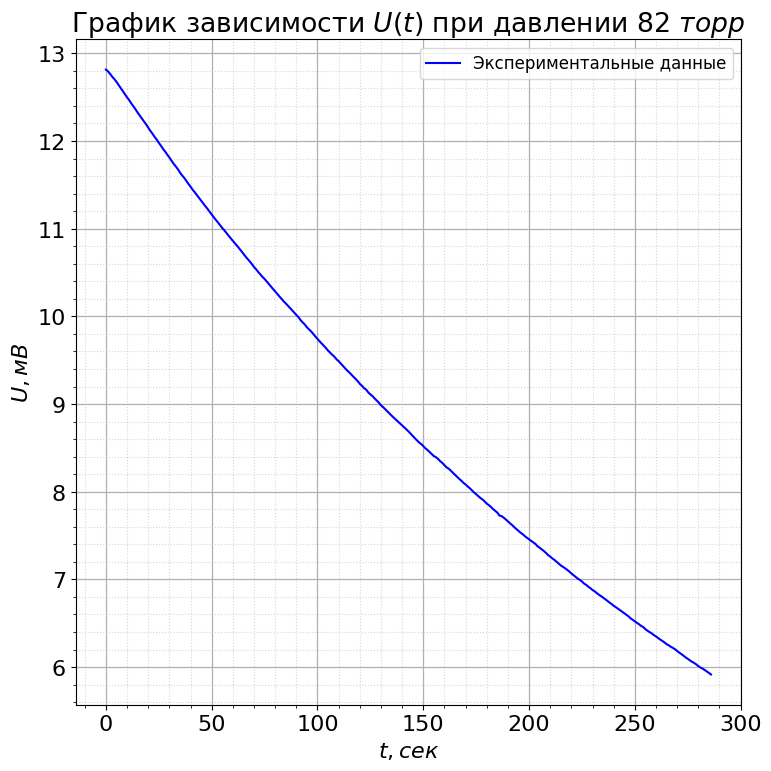

In [6]:
make_raw_plot(82)

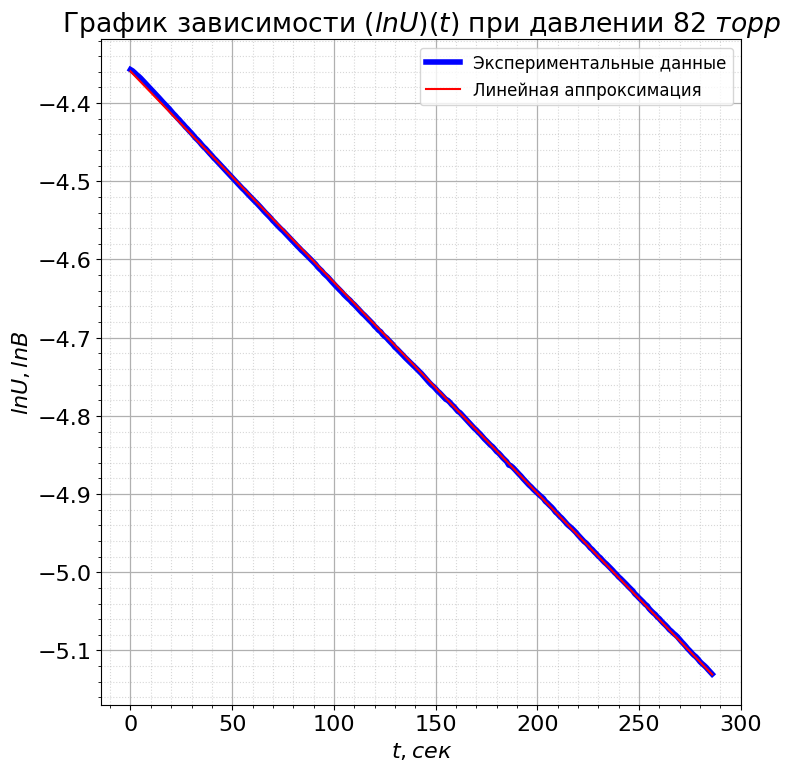

In [7]:
make_lin_plot(82)

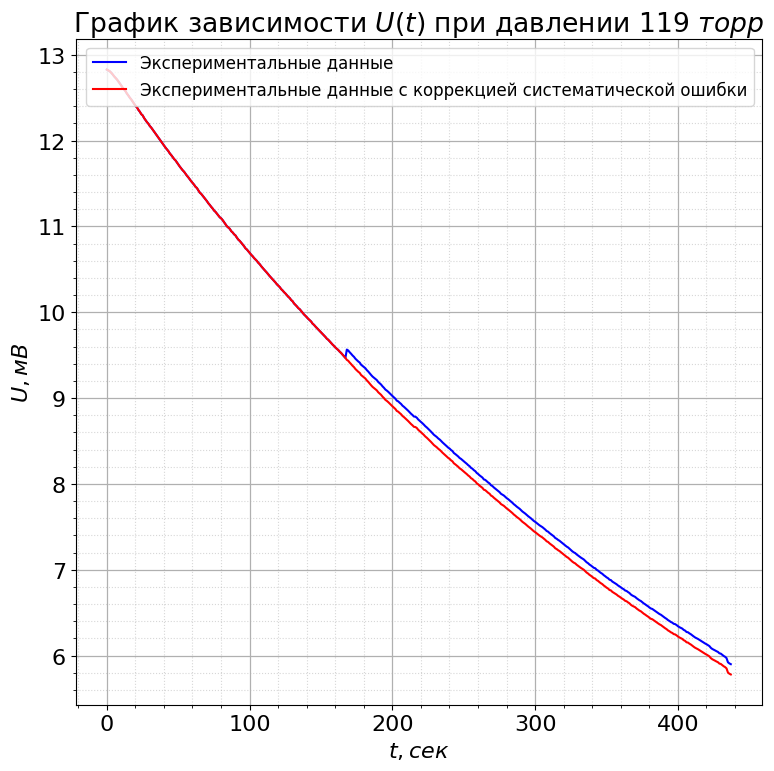

In [8]:
make_raw_plot_with_correction(119)

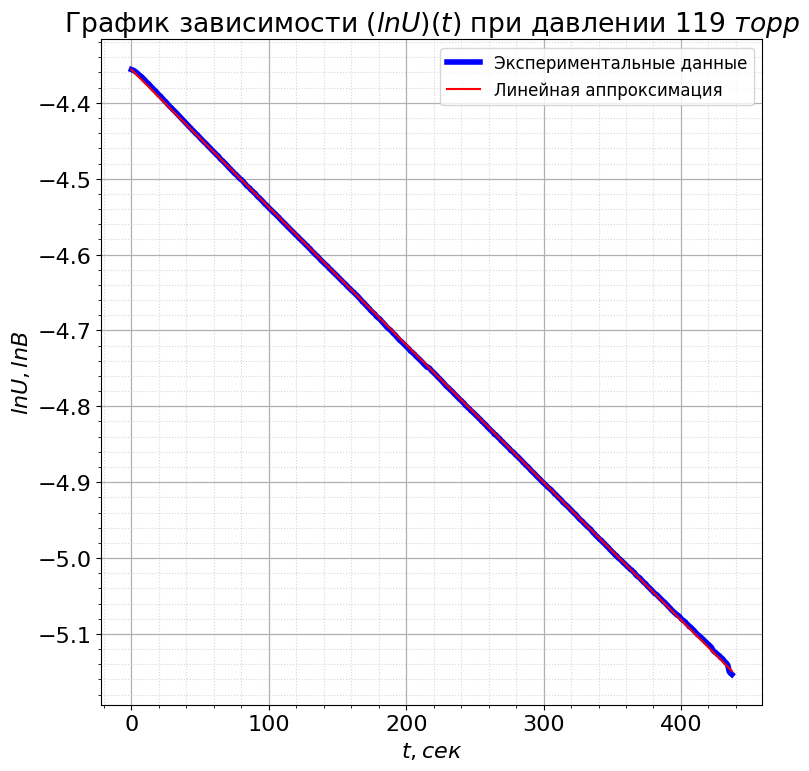

In [9]:
make_lin_plot(119)

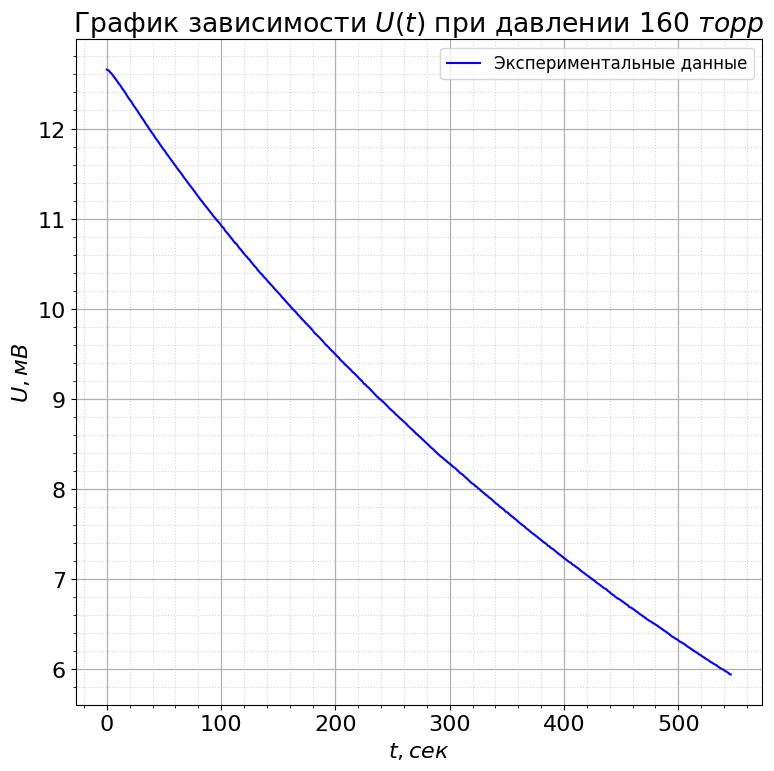

In [10]:
make_raw_plot(160)

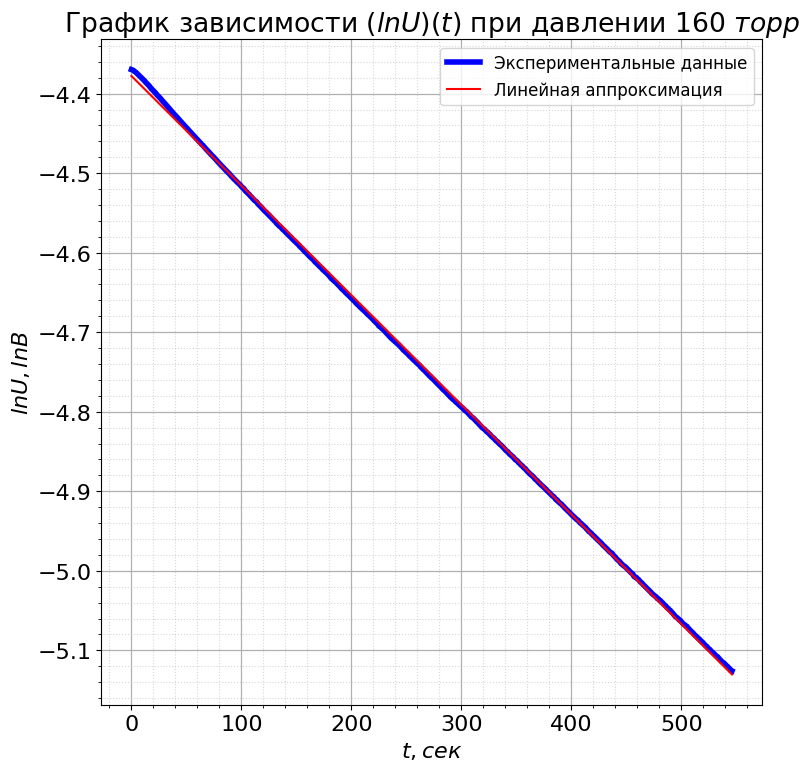

In [11]:
make_lin_plot(160)

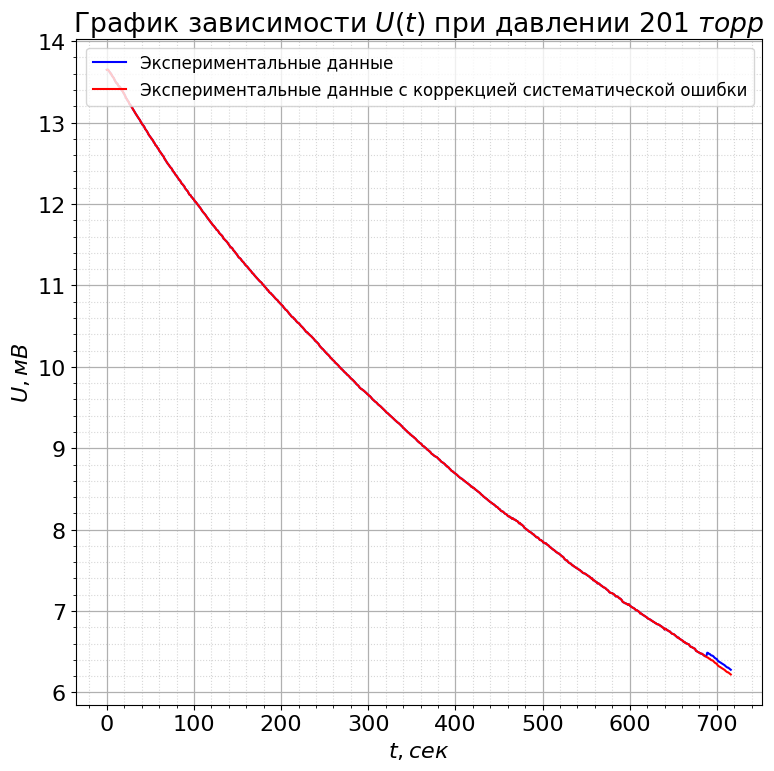

In [12]:
make_raw_plot_with_correction(201)

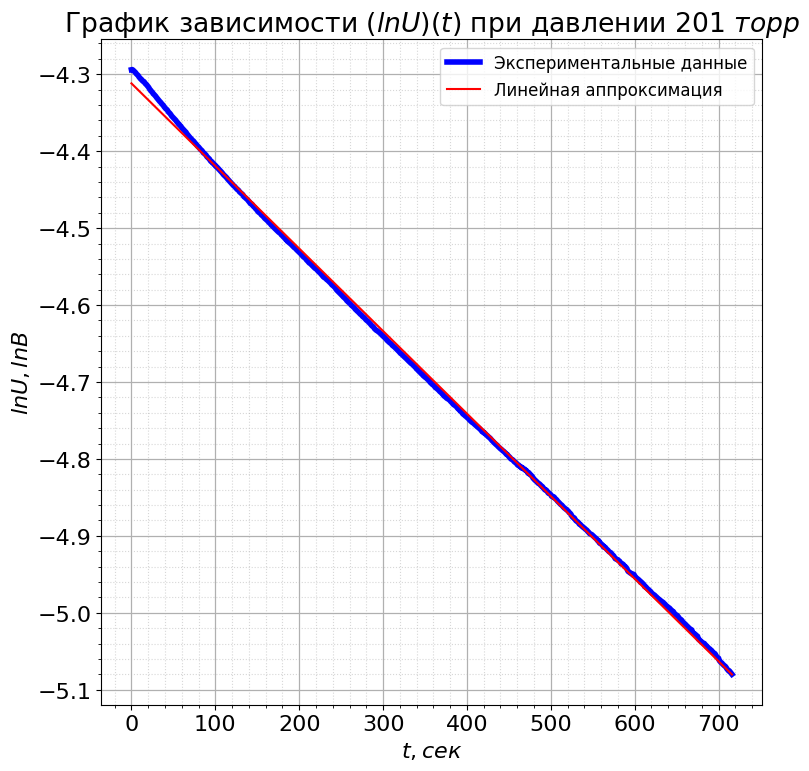

In [13]:
make_lin_plot(201)